LOADING & CLEANING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#changed the encoding lang since the file wasnt saved in UTF-8
df = pd.read_csv('Superstore.csv', encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [2]:
#checking for null values

null_chk = df.isnull()
null_counts = df.isnull().sum()

print(null_counts)
print("\nAcoording to the analysis, no field in the data has a null value")


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Acoording to the analysis, no field in the data has a null value


EXPLORATORY ANALYSIS & VISUAL INSIGHTS

In [ ]:
#Which category sells best

grouped_category = df.groupby('Category')        #summing up sales for each category
category_sales = grouped_category['Sales'].sum()

print('Follwowing are the Category Sales:\n', category_sales)
print(f"\nThe best selling Category is: \"{category_sales.idxmax()}\", with a sale of \"{category_sales.max()}\"")

Follwowing are the Category Sales:
 Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

The best selling Category is: "Technology", with a sale of "836154.033"


Insight:
    Technology is the best selling category having the highest total sales among all categories. As evident from the bar chart below:

<Axes: title={'center': 'Best selling category'}, xlabel='Category', ylabel='Sum of Sales'>

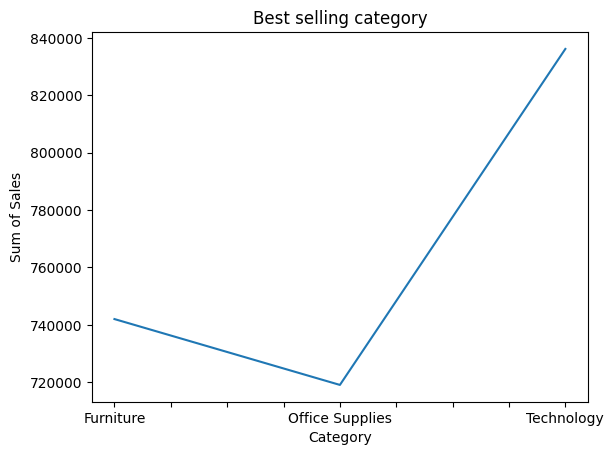

In [19]:
category_sales.plot(kind='line', title='Best selling category', xlabel='Category', ylabel='Sum of Sales')

In [4]:
#Which region earns the most

grouped_region = df.groupby('Region')
regional_sales = grouped_region['Sales'].sum()
highest_earns = regional_sales.max()

print(f"\nThe highest earning region is {regional_sales.idxmax()}, Sales: {highest_earns}")


The highest earning region is West, Sales: 725457.8245


INSIGHT: West earns the most with sales upto 725457.8245

<Axes: title={'center': 'Highest earning region'}, xlabel='Region', ylabel='Sum of Sales'>

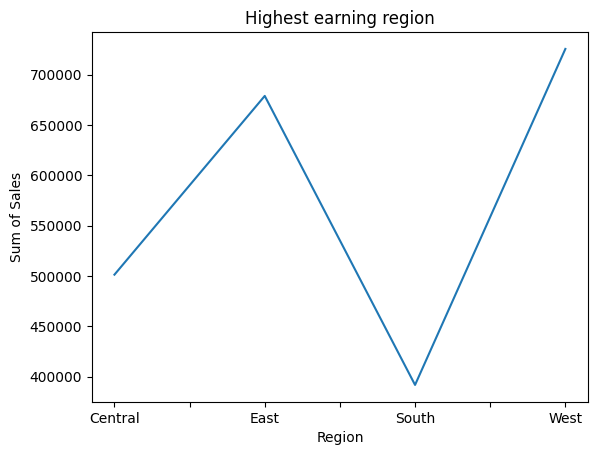

In [20]:
regional_sales.plot(kind='line', title='Highest earning region', xlabel='Region', ylabel='Sum of Sales')

In [5]:
#Where are the most orders placed from/ which city has the highest orders
    
grouped_city = df.groupby('City')
df['value_counted_orders'] = df['Order ID'].map(df['Order ID'].value_counts())

highest_orders_rows = grouped_city['value_counted_orders'].sum().reset_index()
top_city_row = highest_orders_rows.loc[highest_orders_rows['value_counted_orders'].idxmax()]

top_city = top_city_row['City']
highest_orders = top_city_row['value_counted_orders']

print(f"City with the highest number of orders is: \"{top_city}\" with number of orders: {highest_orders}")


City with the highest number of orders is: "New York City" with number of orders: 3025


INSIGHT: New York City has the highest number of Orders. The top 5 cities with the highest count of orders are shown below using bar chart

<Axes: title={'center': 'Top 5 cities with the higest number or orders'}, xlabel='City', ylabel='Sum of Orders'>

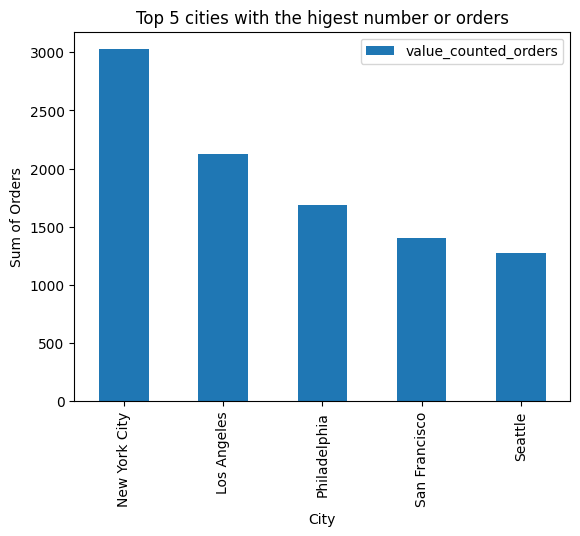

In [ ]:
top_5_cities = highest_orders_rows.sort_values(by='value_counted_orders', ascending=False).head(5)
top_5_cities.plot(kind='bar', title='Top 5 cities with the higest number or orders', x='City', ylabel='Sum of Orders')

In [ ]:
#Which year has the most orders shipped?

df['Ship Year'] = pd.to_datetime(df['Ship Date']).dt.year 
grouped_year = df.groupby('Ship Year')

#counting the orders
df['order_count'] = df['Order ID'].map(df['Order ID'].value_counts()) 

summed_orders = grouped_year['order_count'].sum().reset_index()
top_year_map = summed_orders.loc[summed_orders['order_count'].idxmax()]

top_orders = top_year_map['order_count']
top_year = top_year_map['Ship Year']

print(f"Year with the most orders shipped: {top_year} having {top_orders} orders")

Year with the most orders shipped: 2017 having 9765 orders


INSIGHT: 2017 is the year with the most orders shipped. 
Orders shipped per year are shown in the bar chart below

<Axes: title={'center': 'Order count per Year'}, xlabel='Ship Year', ylabel='Order count'>

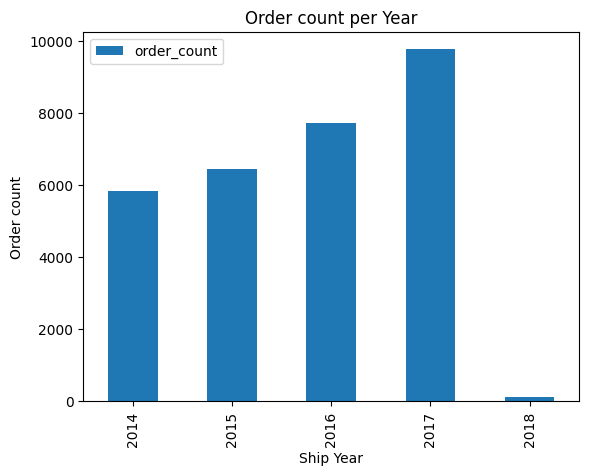

In [22]:
summed_orders.plot(kind='bar', x='Ship Year', y='order_count', ylabel='Order count', title='Order count per Year')

In [ ]:
#does having a higher discount leads to higher or lower sales?

# -> grouping data by discount level and computing avg sales at each level
avg_Sales = df.groupby('Discount')['Sales'].mean()

print(avg_Sales.reset_index())


    Discount       Sales
0       0.00  226.742074
1       0.10  578.397351
2       0.15  529.971567
3       0.20  209.076940
4       0.30  454.742974
5       0.32  536.794770
6       0.40  565.134874
7       0.45  498.634000
8       0.50  892.705152
9       0.60   48.150000
10      0.70   97.177708
11      0.80   56.545853

From the above table it can be clearly seen that Sales and Discount have a non linear graph, For example,
Discount of 0.50 has the highest sales but the Discount of 0.60 has the lowest sales.



INSIGHT: From the heatmap below it can be clearly seen that Sales and Discount have a non linear relation, For example,
Discount of 0.50 has the highest sales but the Discount of 0.60 has the lowest sales.

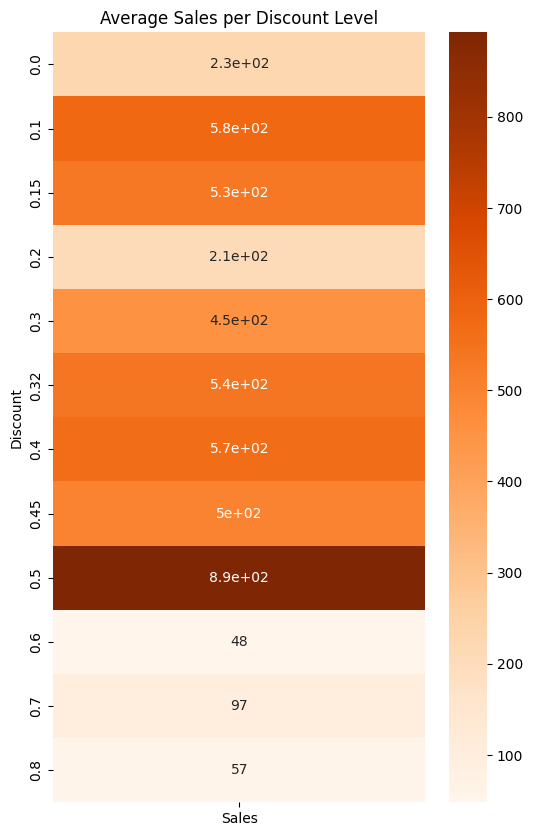

In [23]:
avg_Sales_df = avg_Sales.reset_index() #converting into df
avg_Sales_df = avg_Sales_df.pivot_table(values='Sales', index='Discount')

plt.figure(figsize=(6,10))
sns.heatmap(avg_Sales_df, annot=True, cmap='Oranges')
plt.title("Average Sales per Discount Level")
plt.ylabel("Discount")
plt.show()

In [25]:
#Does shipmode effect profit?

summed_profit = df.groupby('Ship Mode')['Profit'].mean()
print(summed_profit.reset_index())


        Ship Mode     Profit
0     First Class  31.839948
1        Same Day  29.266591
2    Second Class  29.535545
3  Standard Class  27.494770


INSIGHT: Based on the analysis, First Class shipping yields the highest average profit, while Standard Class results in
the lowest. This means highest shipping classes contribute to more positive profit.

<Axes: title={'center': 'Ship mode effect on profit'}, xlabel='Ship Mode', ylabel='Average Profit'>

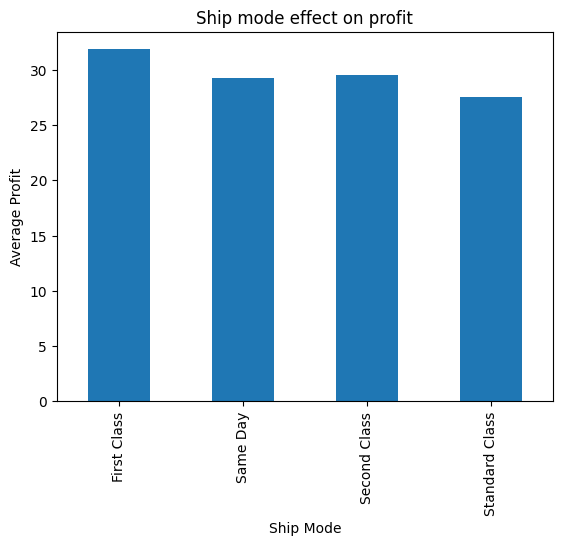

In [24]:
summed_profit.plot(kind='bar', title='Ship mode effect on profit', ylabel='Average Profit')